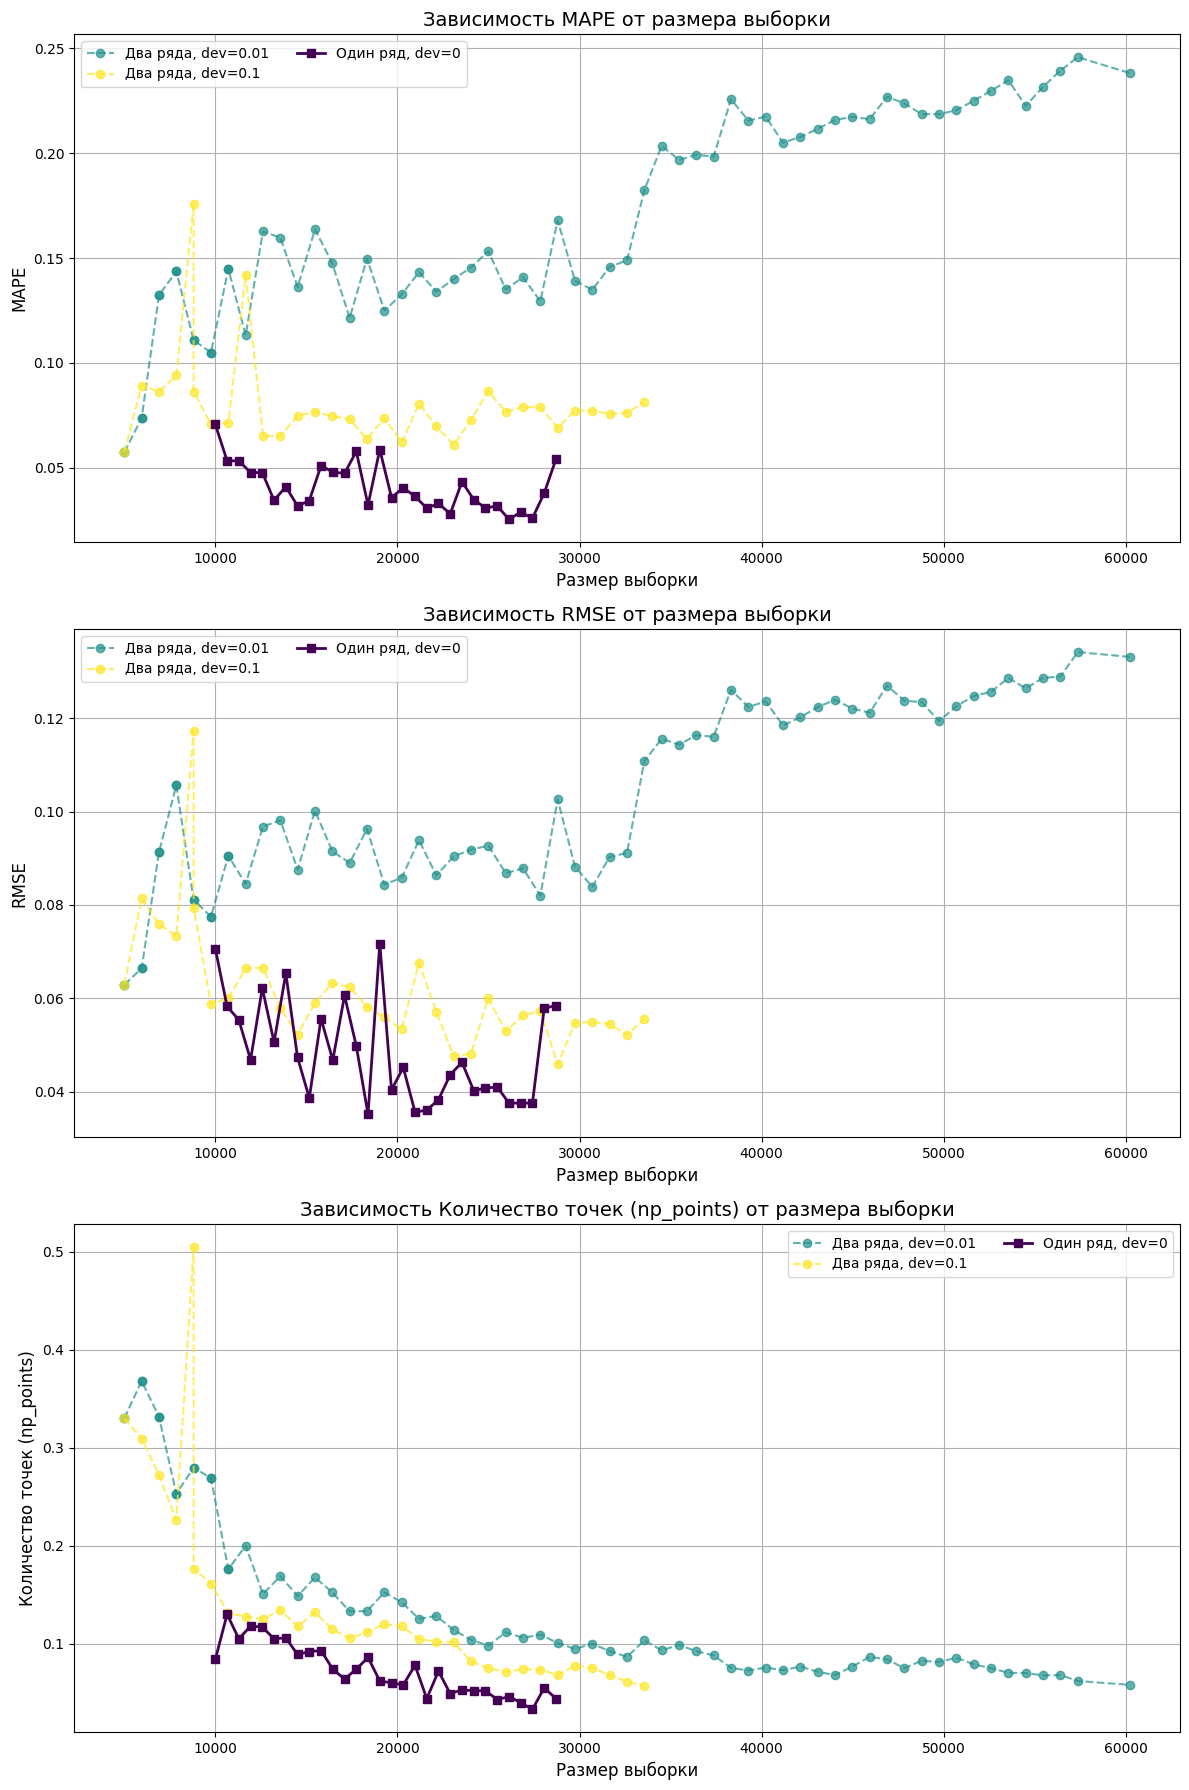

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Загрузка и обработка данных с правильными именами столбцов
data1 = pd.read_csv(
    'experiment.txt',
    header=None,
    names=['deviation', 'second_size', 'prediction_size', 'rmses', 'np_points', 'mape', 'general_size']
)

# Исправлено: единое имя для RMSE ('rmses')
columns2 = ['pred_size', 'general_size', 'deviation', 'mape', 'np_points', 'rmses', 'share']
data2 = pd.read_csv('previous_exp.txt', header=None, names=columns2)
filtered_data = data2[data2['share'] == 1.0].copy()
filtered_data['deviation'] = 0  # Заменяем все отклонения на 0

# 2. Создаем фигуру с 3 графиками (один столбец)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plt.subplots_adjust(hspace=0.3)

# 3. Уникальные отклонения только из первого эксперимента + 0
all_deviations = sorted(set(data1['deviation']).union({0}))
colors = plt.cm.viridis(np.linspace(0, 1, len(all_deviations)))

# 4. Строим графики для каждой метрики
metrics = [
    ('mape', 'MAPE'),
    ('rmses', 'RMSE'),
    ('np_points', 'Количество точек (np_points)')
]

for i, (metric, ylabel) in enumerate(metrics):
    ax = axes[i]

    # Для первого эксперимента (data1)
    for j, dev in enumerate(all_deviations):
        subset = data1[data1['deviation'] == dev]
        if not subset.empty:
            subset = subset.sort_values('general_size')
            ax.plot(
                subset['general_size'],
                subset[metric],
                'o--',
                color=colors[j],
                label=f'Два ряда, dev={dev}',
                alpha=0.7
            )

    # Для второго эксперимента (только одна линия)
    if not filtered_data.empty:
        subset = filtered_data.sort_values('general_size')
        # Используем индекс цвета для dev=0
        j0 = list(all_deviations).index(0) if 0 in all_deviations else 0
        ax.plot(
            subset['general_size'],
            subset[metric],
            's-',
            color=colors[j0],
            label='Один ряд, dev=0',
            linewidth=2
        )

    ax.set_title(f'Зависимость {ylabel} от размера выборки', fontsize=14)
    ax.set_xlabel('Размер выборки', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=10, ncol=2)

# 5. Сохранение и отображение
plt.tight_layout()
plt.savefig('combined_metrics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()